***Key Take aways*** from the below Analysis

1. Age is perdominant factor if the patient is young(30-40 Age Group).
2. There is high chance of making it to the long term if the number of positive node is less than or equal to 4(approx)-For age group 40-60.
3. Compared to above 2 age groups, for 60 above age group the effect of slight increase of the positive node have increased with Age.
4. Auxillary positive node feature predominants Age  featre with increase in age.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt

In [2]:
data_Haberman = pd.read_csv("C:/Users/Varun/Desktop/AAIC/1 Assignment - EDA - Haberman/haberman.csv")
data_Haberman.columns = ["Age","Op_Year","auxi_nodes","Surv_status"]

About the dataset: The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Number of Attributes: 4 (including the class attribute)

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year

**Task**:Perform EDA to understand which features are useful in classification.

Based on the below article, I will be giving emphasize on 'Age' and 'Positive auxillary' features for analysis.

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3227897/ : Age at diagnosis is nonlinearly related to the lymph node ratio(LNR), indicating a greater burden of disease with advancing age.Elderly women with a higher tumor burden had an increased risk of breast cancer death added on top of other risks.

In [3]:
data_Haberman['Surv_status'].value_counts()

#Number of Instances: 306
#Unbalanced dataset as the number of data points are unequal with 225 points belonging to the patient survived 5 years or longer.

1    225
2     81
Name: Surv_status, dtype: int64

# 2-D Scatter Plot

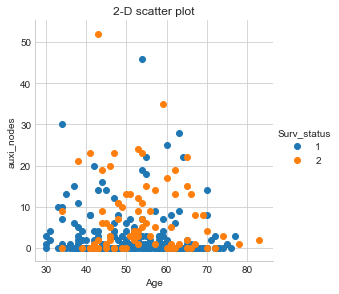

In [17]:
sns.set_style("whitegrid");
sns.FacetGrid(data_Haberman, hue="Surv_status", size=4) \
   .map(plt.scatter, "Age", "auxi_nodes") \
   .add_legend();
plt.title("2-D scatter plot")
plt.show();

**Observation:** 
1. To hard to disingiush as there is much overlap 
2. High concentration of the points at lower number of axil_nodes.

# Pair Plot

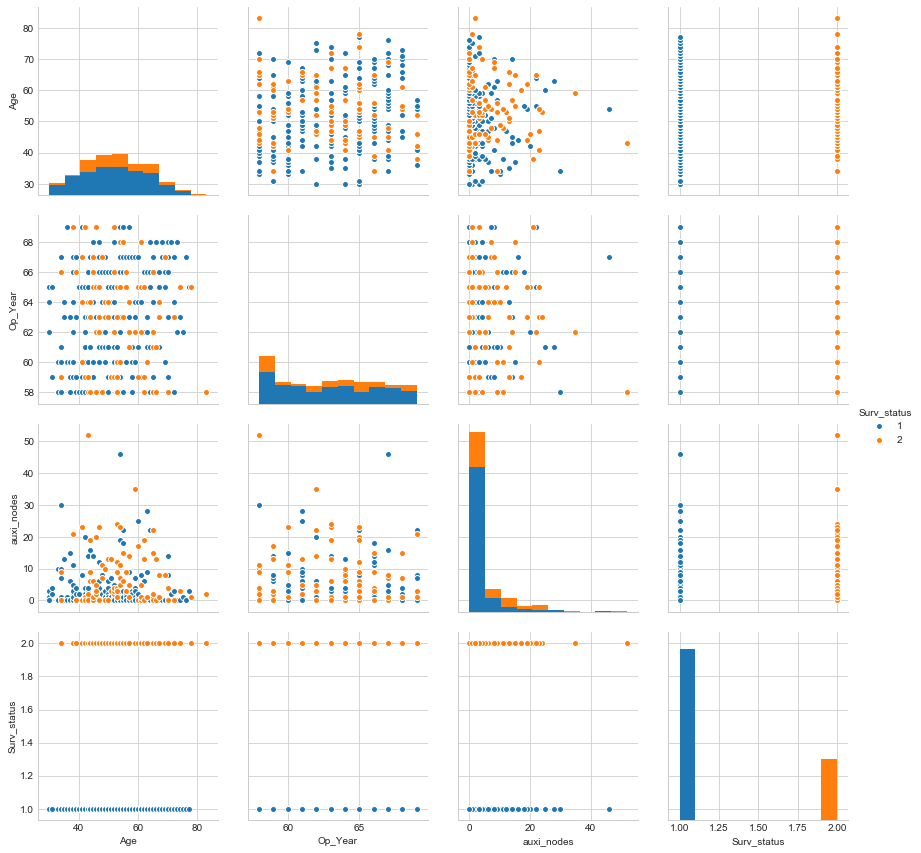

In [5]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(data_Haberman, hue="Surv_status", size=3);
plt.show()

**Observation:** 
Unable to disingiush as there is much overlap 

C:\Users\Varun\Anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
C:\Users\Varun\Anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


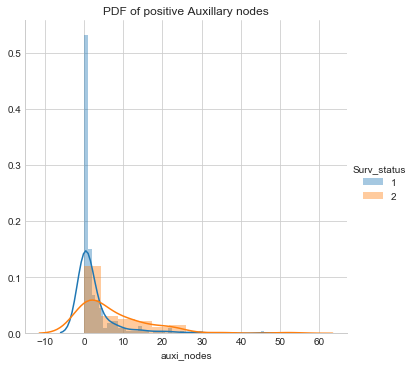

In [19]:
sns.FacetGrid(data_Haberman, hue="Surv_status", size=5) \
   .map(sns.distplot, "auxi_nodes") \
   .add_legend();
plt.title("PDF of positive Auxillary nodes")
plt.show()

**Observation:** 
More than 50% of long_term survivors have 0 positive auxillary nodes and most of them having less than 10 nodes.
Through short_term survivors also have 0 positive auxillary nodes,but the data is more spread across auxi_nodes. 


C:\Users\Varun\Anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
C:\Users\Varun\Anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


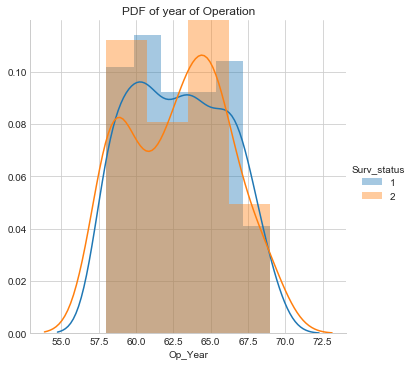

In [20]:
sns.FacetGrid(data_Haberman, hue="Surv_status", size=5) \
   .map(sns.distplot, "Op_Year") \
   .add_legend();

plt.title("PDF of year of Operation")
plt.show()

**Observation:** The data is highly overlaping. Unable to distinguish

C:\Users\Varun\Anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
C:\Users\Varun\Anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


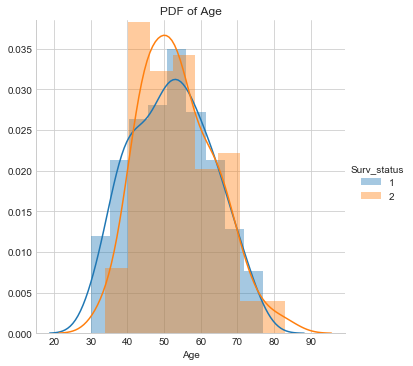

In [21]:
sns.FacetGrid(data_Haberman, hue="Surv_status", size=5) \
   .map(sns.distplot, "Age") \
   .add_legend();

plt.title("PDF of Age")
plt.show()

**Observation** :
For the age between 30 - 40 , long term surviors is much higher.Going more Deeper by analyzing the data into 3 age groups.
30-40, 40-60,and 60 and above for further analysis 

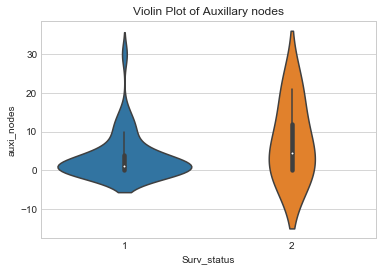

In [22]:
sns.violinplot(x='Surv_status',y='auxi_nodes', data=data_Haberman[(data_Haberman.Age<=40)])
plt.title("Violin Plot of Auxillary nodes")
plt.show()

**observations:** 
1. Most of the long term surviers have 0 positive auxillary node with median closer to 0 with 75% of patients having less than 5 positive nodes.But there are survivors having more than 5 nodes, including nearly 30 auxi nodes.
2. Also, for the short term survivors ,nearly 50% of patients have less than 5 postive nodes.

[0.66666667 0.12820513 0.05128205 0.07692308 0.02564103 0.02564103
 0.         0.         0.         0.02564103]
[ 0.  3.  6.  9. 12. 15. 18. 21. 24. 27. 30.]
[0.5  0.   0.   0.   0.25 0.   0.   0.   0.   0.25]
[ 0.   2.1  4.2  6.3  8.4 10.5 12.6 14.7 16.8 18.9 21. ]


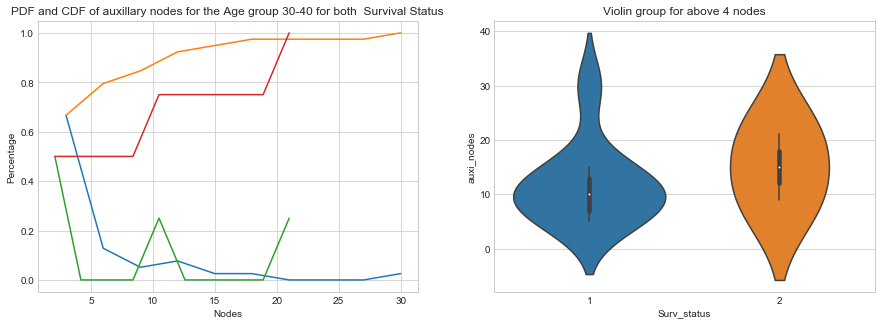

In [28]:
f = plt.figure(figsize=(15,5))
plt.subplot(121)
counts, bin_edges = np.histogram(data_Haberman[(data_Haberman.Age<=40) & (data_Haberman.Surv_status==1)]['auxi_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(data_Haberman[(data_Haberman.Age<=40) & (data_Haberman.Surv_status==2)]['auxi_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel("Nodes")
plt.ylabel("Percentage")
plt.title("PDF and CDF of auxillary nodes for the Age group 30-40 for both  Survival Status")
plt.subplot(122)
sns.violinplot(x='Surv_status',y='auxi_nodes', data=data_Haberman[(data_Haberman.Age<=40) & (data_Haberman.auxi_nodes>=5)])
plt.title("Violin group for above 4 nodes")
plt.show()

**Observations:**
1. There are more than 22% of long term surivors(of Age group 30-40) even with large number(>=5) of positive auxillary nodes(Orange line),including 1 with 30 nodes(blue line).Violin plot is filtered to more than 4 positive auxillary nodes.
2. Also, There are 50% short-term surviors( of 30-40 Age group) even with zero auxillary nodes(red line of fig 1).

Hence given long-term surviors even with large number of positive auxillary nodes and short_term survivors with 0 nodes, we conclude that for the patients of young age(30-40 as per this dataset) age is perdominant factor if the patient is young.

# Age 40-60

[0.70992366 0.12977099 0.02290076 0.0610687  0.         0.00763359
 0.02290076 0.00763359 0.01526718 0.00763359 0.00763359 0.
 0.         0.         0.         0.         0.         0.
 0.         0.00763359]
[ 0.   2.3  4.6  6.9  9.2 11.5 13.8 16.1 18.4 20.7 23.  25.3 27.6 29.9
 32.2 34.5 36.8 39.1 41.4 43.7 46. ]
[0.32727273 0.2        0.09090909 0.07272727 0.07272727 0.07272727
 0.01818182 0.03636364 0.05454545 0.01818182 0.         0.
 0.         0.01818182 0.         0.         0.         0.
 0.         0.01818182]
[ 0.   2.6  5.2  7.8 10.4 13.  15.6 18.2 20.8 23.4 26.  28.6 31.2 33.8
 36.4 39.  41.6 44.2 46.8 49.4 52. ]


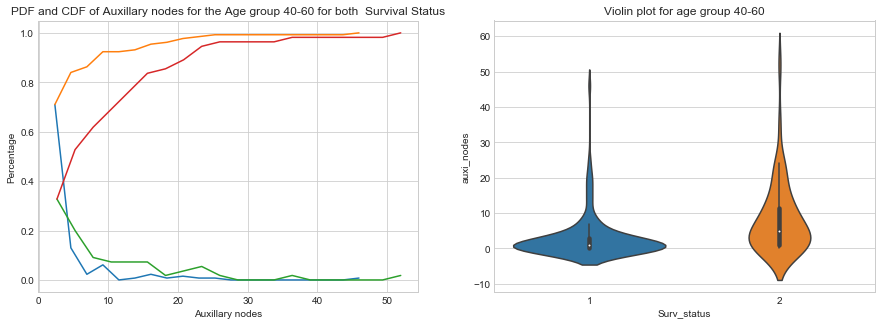

In [29]:
f = plt.figure(figsize=(15,5))
plt.subplot(121)
counts, bin_edges = np.histogram(data_Haberman[(data_Haberman.Age>40)&(data_Haberman.Age<=60)&(data_Haberman.Surv_status==1)]['auxi_nodes'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(data_Haberman[(data_Haberman.Age>40)&(data_Haberman.Age<=60)&(data_Haberman.Surv_status==2)]['auxi_nodes'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel("Auxillary nodes")
plt.ylabel("Percentage")
plt.title("PDF and CDF of Auxillary nodes for the Age group 40-60 for both  Survival Status")
plt.subplot(122)

sns.violinplot(x='Surv_status',y='auxi_nodes', data=data_Haberman[(data_Haberman.Age>40)&(data_Haberman.Age<=60)])
plt.title("Violin plot for age group 40-60")
plt.show()

**Observations** 
1. More than 80% of the long term surivors have less than 4 positive nodes(Orange line) with 60% of them having 
less than/equal to 1 positive node(blue violin).
2. Also75% of the short term  surivors have more than 1 positive nodes, with 50% of them with more the/equal to 5 positve nodes(red line).

Hence, in this age group there is high chance of making it to the long term if the number of positive node is less than or equal to 4(approx).

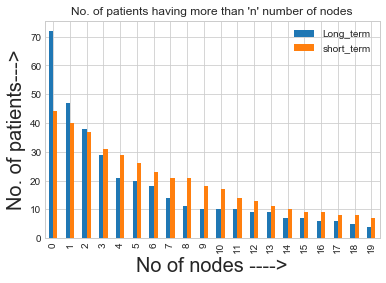

In [30]:
#source:https://www.geeksforgeeks.org/python-pandas-dataframe-plot-bar/
dA4t6=data_Haberman[(data_Haberman.Age>40)& (data_Haberman.Age<=60)]
hist = pd.DataFrame(columns=['Long_term', 'short_term'])
for i in range(0,20):
    hist = hist.append(pd.Series([dA4t6.Surv_status[(dA4t6.Surv_status==1)&(dA4t6.auxi_nodes>i)].count(), dA4t6.Surv_status[(dA4t6.Surv_status==2)&(dA4t6.auxi_nodes>i)].count()],index=hist.columns),ignore_index=True)
hist.plot.bar()
plt.xlabel('No of nodes ---->',size=20)
plt.ylabel('No. of patients--->',size=20)
plt.title("No. of patients having more than 'n' number of nodes")
plt.show()

**Observation:**
The sharp decrease in the blue bar at the lower values of nodes shows the impact of the increase in the positive auxillary nodes at their lower level.
And for the positive nodes more than 3, the survivability for more than 5 years decreases by less than 50%

# Age above 60

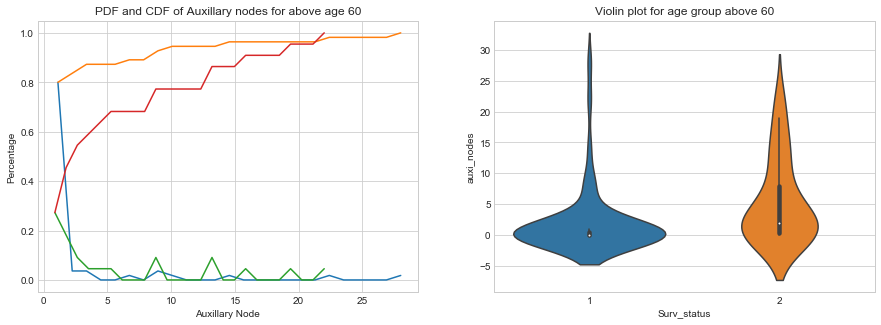

In [31]:
f = plt.figure(figsize=(15,5))
plt.subplot(121)
counts, bin_edges = np.histogram(data_Haberman[(data_Haberman.Age>60)&(data_Haberman.Surv_status==1)]['auxi_nodes'], bins=25, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(data_Haberman[(data_Haberman.Age>60)&(data_Haberman.Surv_status==2)]['auxi_nodes'], bins=25, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel("Auxillary Node")
plt.ylabel("Percentage")
plt.title("PDF and CDF of Auxillary nodes for above age 60")

plt.subplot(122)
sns.violinplot(x='Surv_status',y='auxi_nodes', data=data_Haberman[(data_Haberman.Age>60)])
plt.title("Violin plot for age group above 60")
plt.show()

**Observations**:
1. 80% of Long-term patients have not more than 1 positive nodes(Orange line) **which is more than other age groups**(Could be because of the pervious age gourp having less survivability for positive auxillary node of more than 4 ). Also roughly 10% of them are above 3 positive nodes.
2. 50% of the short-term patients have less than 3 positive node(red line). 

Hence comparing to the previous age group, the effect with slight increase of the positive node have increased with Age. 


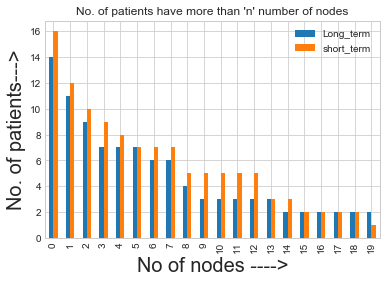

In [15]:
dA4t6=data_Haberman[(data_Haberman.Age>60)]
hist = pd.DataFrame(columns=['Long_term', 'short_term'])
for i in range(0,20):
    hist = hist.append(pd.Series([dA4t6.Surv_status[(dA4t6.Surv_status==1)&(dA4t6.auxi_nodes>i)].count(), dA4t6.Surv_status[(dA4t6.Surv_status==2)&(dA4t6.auxi_nodes>i)].count()],index=hist.columns),ignore_index=True)
hist.plot.bar()
plt.xlabel('No of nodes ---->',size=20)
plt.ylabel('No. of patients--->',size=20)
plt.title("No. of patients have more than 'n' number of nodes")
plt.show()

**Observation**
For the positive nodes more than 0, the survibility for more than 5 years decreases by less than 50%.

# Year

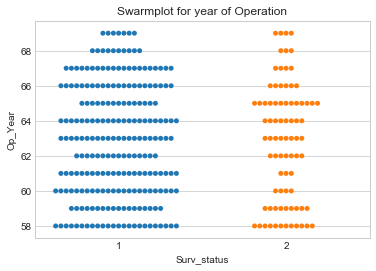

In [32]:
#source https://elitedatascience.com/python-seaborn-tutorial
sns.swarmplot( x='Surv_status', y='Op_Year', data=data_Haberman )
plt.title("Swarmplot for year of Operation")
plt.show()

Conclusion:
1. Age is perdominant factor if the patient is young(30-40 Age Group).
2. There is high chance of making it to the long term if the number of positive node is less than or equal to 4(approx)-For age group 40-60.
3. For the Age group 40-60 having positive nodes more than 3, the survivability for more than 5 years decreases by less than 50%.
4. Compared to above 2 age groups, for 60 above age group the effect of slight increase of the positive node is increased with Age.
5. For the Age group above 60 having positive nodes more than 0, the survibility for more than 5 years decreases by less 50%.
6. Auxillary positive node feature predominants Age featre with increase in Age.